0.0023047265
0.5761816130246165


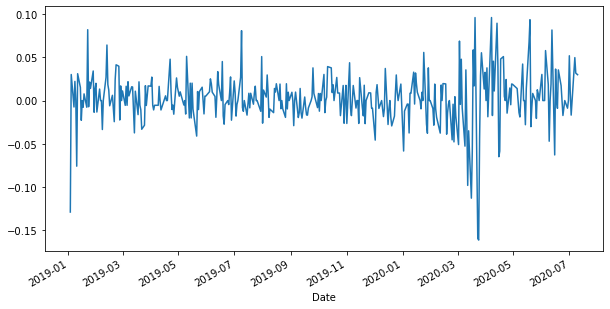

In [13]:
import pandas_datareader as pdr
import numpy as np
import seaborn as sns
import datetime
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import mplfinance as mpf
#from mplfinance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc

stock = pdr.get_data_yahoo('com7.BK', 
                          start=datetime.datetime(2019, 1, 1), 
                          end=datetime.datetime(2020, 7, 10))


#COM7 = web.DataReader(company,'yahoo',start,end)

stock['log_return'] = np.log(stock['Adj Close'] / stock['Adj Close'].shift(1))  #formula_SimpleReturn
stock.to_csv (r'C:\Users\KAKAREM\Desktop\LH.csv',index = False,  header=True)    #Save.csv(excel)

#print(COM7)
#print(COM7.index)     #ดูจำนวนวัน
#print(COM7.shape[0])  #check_theNumber_Column0
#print(COM7.tail())


# Plot Graph ดู
stock['log_return'].plot(figsize=(10,5))

# หาค่าเฉลี่ย #
log_return_d = stock['log_return'].mean()
print('%.10f'% log_return_d)  #ใช้ทศนิยม10ตำแหน่ง

# เอาค่าเฉลี่ยมาคูณ 250 วัน คือ จำนวนวันทั้งปี
log_return_a = log_return_d * 250
print(log_return_a)

# Logarithmic Rate Return ต่อ 1 ปี
#print (str(round(log_return_a * 100, 5)) + ' %')

In [14]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close,log_return
Date,,,,,,,
2019-01-02,15.6,14.5,15.6,14.9,10059100.0,14.392361,NaN
2019-01-03,15.0,13.0,15.0,13.1,28487000.0,12.653687,-0.128749
2019-01-04,13.6,11.5,12.7,13.5,70530900.0,13.040059,0.030077
2019-01-07,13.9,13.4,13.7,13.4,22442300.0,12.943465,-0.007435
2019-01-08,14.3,13.3,13.5,13.7,26323500.0,13.233244,0.022141


In [15]:
stock.tail()

,High,Low,Open,Close,Volume,Adj Close,log_return
Date,,,,,,,
2020-07-03,30.25,29.25,29.75,29.5,8722800.0,29.5,-0.016807
2020-07-07,31.50,29.75,30.25,31.0,12364600.0,31.0,0.049597
2020-07-08,32.00,30.75,31.25,32.0,13093900.0,32.0,0.031749
2020-07-09,34.00,32.25,32.25,33.0,19863700.0,33.0,0.030772
2020-07-10,34.25,33.50,33.50,34.0,8995400.0,34.0,0.029853


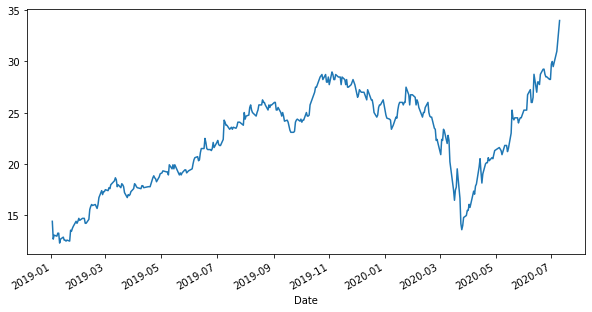

In [16]:
#style.use('ggplot')
plt.figure(figsize=(10,5))
stock['Adj Close'].plot()
plt.show()

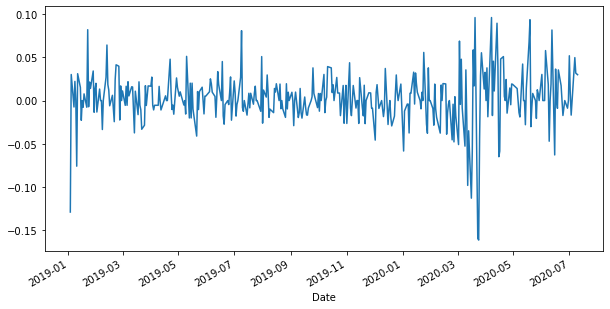

In [17]:
plt.figure(figsize=(10,5))
stock['log_return'].plot()

In [18]:
stock.cumsum()

,High,Low,Open,Close,Volume,Adj Close,log_return
Date,,,,,,,
2019-01-02,15.600000,14.50,15.600000,14.900000,1.005910e+07,14.392361,NaN
2019-01-03,30.600000,27.50,30.600000,28.000000,3.854610e+07,27.046048,-0.128749
2019-01-04,44.200001,39.00,43.300000,41.500000,1.090770e+08,40.086107,-0.098671
2019-01-07,58.100000,52.40,57.000000,54.900000,1.315193e+08,53.029572,-0.106107
2019-01-08,72.400001,65.70,70.500000,68.599999,1.578428e+08,66.262816,-0.083965
...,...,...,...,...,...,...,...
2020-07-03,8453.599995,8138.90,8284.650002,8296.999989,3.536133e+09,8195.025928,0.717693
2020-07-07,8485.099995,8168.65,8314.900002,8327.999989,3.548498e+09,8226.025928,0.767290
2020-07-08,8517.099995,8199.40,8346.150002,8359.999989,3.561591e+09,8258.025928,0.799038


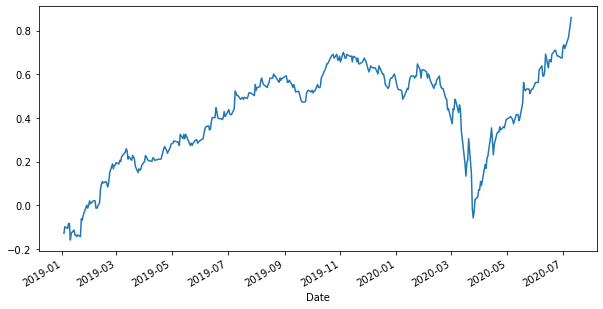

In [19]:
plt.figure(figsize=(10,5))
cum = stock['log_return'].cumsum()

cum.plot()

<BarContainer object of 374 artists>

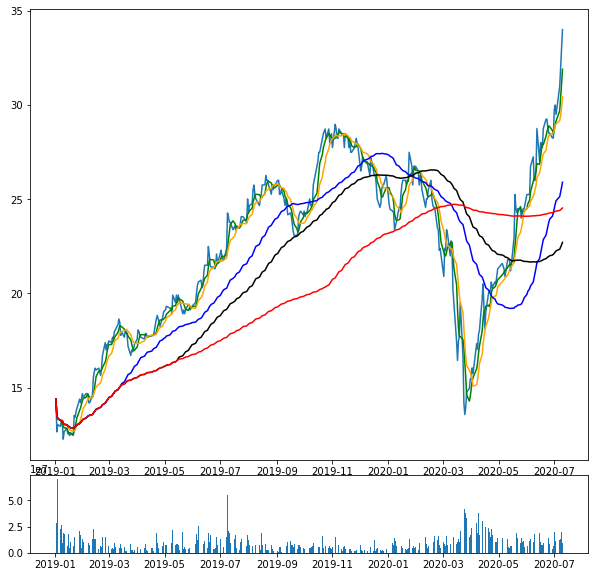

In [20]:
plt.figure(figsize=(10,10))
stock_copy= stock.copy()
stock_copy['5ma']  = stock['Adj Close'].rolling(window=5,min_periods=0).mean()
stock_copy['10ma'] = stock['Adj Close'].rolling(window=10,min_periods=0).mean()

stock_copy['50ma']  = stock['Adj Close'].rolling(window=50,min_periods=0).mean()
stock_copy['89ma']  = stock['Adj Close'].rolling(window=89,min_periods=0).mean()
stock_copy['200ma'] = stock['Adj Close'].rolling(window=200,min_periods=0).mean()

ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)

ax1.plot(stock.index, stock['Adj Close'])
ax1.plot(stock_copy.index, stock_copy['5ma'],   color = 'green')
ax1.plot(stock_copy.index, stock_copy['10ma'],  color = 'orange')
ax1.plot(stock_copy.index, stock_copy['50ma'],  color = 'blue')
ax1.plot(stock_copy.index, stock_copy['89ma'],  color = 'black')
ax1.plot(stock_copy.index, stock_copy['200ma'], color = 'red')

ax2.bar(stock.index, stock['Volume'])  #Volume

In [21]:
stock_copy.tail()

,High,Low,Open,Close,Volume,Adj Close,log_return,5ma,10ma,50ma,89ma,200ma
Date,,,,,,,,,,,,
2020-07-03,30.25,29.25,29.75,29.5,8722800.0,29.5,-0.016807,29.15,29.000,24.924060,22.262919,24.372423
2020-07-07,31.50,29.75,30.25,31.0,12364600.0,31.0,0.049597,29.70,29.175,25.141837,22.348532,24.404081
2020-07-08,32.00,30.75,31.25,32.0,13093900.0,32.0,0.031749,30.45,29.450,25.379614,22.457625,24.443216
2020-07-09,34.00,32.25,32.25,33.0,19863700.0,33.0,0.030772,31.10,29.875,25.627484,22.576841,24.486856
2020-07-10,34.25,33.50,33.50,34.0,8995400.0,34.0,0.029853,31.90,30.425,25.901298,22.711746,24.536486


In [22]:
stock_ohlc   = stock['Adj Close'].resample('10D').ohlc()
stock_volume = stock['Volume'].resample('10D').sum()

stock_ohlc.reset_index(inplace=True)
stock_ohlc['Date'] = stock_ohlc['Date'].map(mdates.date2num)

#print(stock_volume)
print(stock_ohlc.tail())

        Date   open   high    low  close
51  737571.0  24.00  25.25  24.00  25.25
52  737581.0  26.75  28.75  26.00  28.75
53  737591.0  27.00  29.25  27.00  28.75
54  737601.0  28.50  30.00  28.25  29.50
55  737611.0  31.00  34.00  31.00  34.00


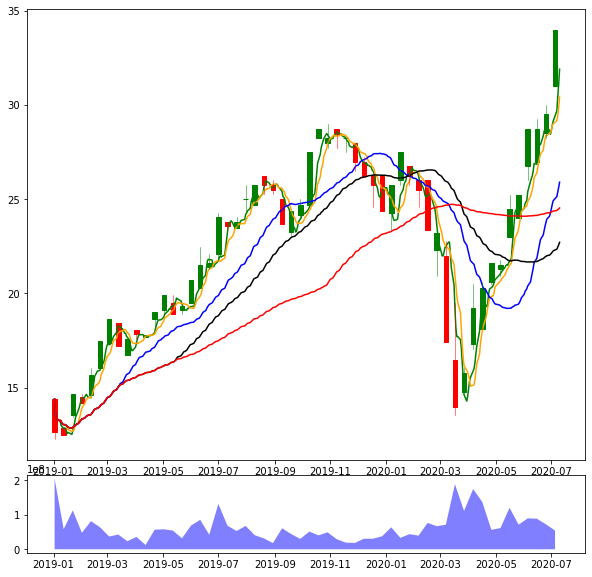

In [23]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.xaxis_date()

ax1.plot(stock_copy.index, stock_copy['5ma']  ,  color = 'green')
ax1.plot(stock_copy.index, stock_copy['10ma'] ,  color = 'orange')
ax1.plot(stock_copy.index, stock_copy['50ma'] ,  color = 'blue')
ax1.plot(stock_copy.index, stock_copy['89ma'] ,  color = 'black')
ax1.plot(stock_copy.index, stock_copy['200ma'],  color = 'red')

candlestick_ohlc(ax1, stock_ohlc.values, width=5, colorup = 'green')

ax2.fill_between(stock_volume.index.map(mdates.date2num), stock_volume.values,0,facecolor='b', alpha=0.5)
plt.show()

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os
import matplotlib.pyplot as plt
def create_dataset(ticker, daysPrediction=50,splitProportion=0.8):
    #Read data
    #COM7 = pd.read_csv('set.csv')
    COM7 = pdr.get_data_yahoo('COM7.BK', 
                         start=datetime.datetime(2019, 1, 1), 
                          end=datetime.datetime(2019, 12, 31))
    tickers = COM7.columns.values.tolist()
    COM7.to_csv (r'C:\Users\KAKAREM\Desktop\LH.csv',index = False,  header=True)  

    #Get Adj Close values of ticker and convert it to numpy array
    values = COM7[ticker].values
    values=values.reshape(-1,1)

    #Split the dataset in the training set and test set
    dataset_train = np.array(values[:int(values.shape[0] * splitProportion)])
    dataset_test = np.array(values[int(values.shape[0] * splitProportion) - daysPrediction:])

    #Normalize dataset in range [0-1]
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset_train = scaler.fit_transform(dataset_train)
    dataset_test = scaler.transform(dataset_test)

    #Create the X and Y variables of the dataset in a format numpy array
    x_train, y_train = create_d_dataset(dataset_train,daysPrediction)
    x_test, y_test = create_d_dataset(dataset_test,daysPrediction)

    #Prepare data for the neural network
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    #Return dataset and other data
    return x_test,y_test,x_train,y_train,df,ticker,scaler,values

def create_d_dataset(val,daysPrediction):

    x = []
    y = []
    for i in range(daysPrediction, val.shape[0]):
        x.append(val[i-daysPrediction:i, 0])
        y.append(val[i, 0])
    x = np.array(x)
    y = np.array(y)

    return x,y


def train(train_x,train_y,ticker):
    #Create LSTM RNN model
 
    model = Sequential()
   
    model.add(LSTM(units=96, return_sequences=True, input_shape=(train_x.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=96, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=96, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=96))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
  
    #Train network and save it
    if (not os.path.exists(f'stock_prediction-{ticker}.h5')):
        model.fit(train_x, train_y, epochs=3, batch_size=32)
        model.save(f'stock_prediction-{ticker}.h5')

def show_results(test_x,test_y,train_y,ticker,scaler,values,COM7):
    #Load the trained neural network
    model = load_model(f'stock_prediction-{ticker}.h5')

    #Use the network to to predict the test dataset
    predictions = model.predict(test_x)
    predictions = scaler.inverse_transform(predictions)
    

    #Graphically see the prediction of the neural network
    fig, ax = plt.subplots(figsize=(20, 10))
   
    y_test_scaled = scaler.inverse_transform(test_y.reshape(-1, 1))
    ax.plot(y_test_scaled, color=(0, 0, 0.7, 0.5), label="True Price")
    plt.plot(predictions, color=(0, 0.7, 0,0.5),
            label='Predicted Testing Price')
    plt.legend()
    
    #Temporal
    fig, ax2 = plt.subplots(figsize=(20, 10))
    plt.plot(COM7[ticker].values, color=(0, 0, 0.7, 0.5), label="True Price")
    ax2.plot(range(len(train_y) + 50, len(train_y) + 50 + len(predictions)), predictions, color=(0, 0.7, 0,0.5),
             label='Predicted Testing Price')
    plt.legend()

def predictFuture(ticker):
    #Create the dataset with the given ticker
    x_test,y_test,x_train,y_train,COM7,ticker,scaler,values=create_dataset(ticker)

    #Train the RNN network
    train(x_train,y_train,ticker=ticker)

    #Show results of the training
    show_results(x_test,y_test, y_train,ticker,scaler,values,COM7)

Using TensorFlow backend.


In [11]:
predictFuture(stock)

ValueError: Boolean array expected for the condition, not float64